# Data Mining Project
<br>Content: 
* [About the dataset](#1)
* [Load Data From CSV File](#2)
* [Data Visualization and Analysis](#3)
* [Preprocessing](#4)
    * [Feature Composition](#5)
    * [CART Classification Feature Importance](#6)
* [Classifications](#7)
    * [Naive Bayes Classifier](#8)
    * [Decision Tree Classifier](#9)
    * [KNN Classifier](#10)
* [Clustering](#11)
    * [K-Means Clustering](#12)
    * [Hierarchical Clustering](#13)
    * [Agglomerative Clustering](#14)
* [Conclusion](#15)

<div id="1">
    <h2>About the dataset</h2>
</div>

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 
The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of :
- Insufficient Weight, 
- Normal Weight, 
- Overweight Level I, 
- Overweight Level II, 
- Obesity Type I, 
- Obesity Type II,
- Obesity Type III.

(77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.)

<div id="2">
    <h2>Load Data From CSV File</h2>
</div>

In [1]:
import itertools
import numpy as np
import pandas as pd

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


The attributes related with eating habits are:
- FAVC$\;\;\;\;\;\;$: Frequent consumption of high caloric food
- FCVC$\;\;\;\;\;\;$: Frequency of consumption of vegetables
- NPC$\;\;\;\;\;\;\;$: Number of main meals
- CAEC$\;\;\;\;\;$: Consumption of food between meals
- CH20$\;\;\;\;\;\;$: Consumption of water daily

The attributes related with the physical condition are:
- SCC$\;\;\;\;\;\;$: Calories consumption monitoring
- FAF$\;\;\;\;\;\;\;$: Physical activity frequency
- TUE$\;\;\;\;\;\;\;$: Time using technology devices
- MTRANS : Transportation used

<div id="3">
    <h2>Data Visualization and Analysis</h2> 
</div>

#### The number of obesity types in the data set and the graph of their distribution

In [2]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

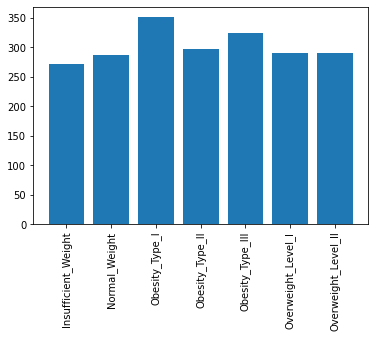

In [3]:
import matplotlib.pyplot as plt

labels, counts = np.unique(df['NObeyesdad'],return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels, rotation='vertical')
plt.show()

<div id="4">
    <h2>Preprocessing</h2> 
</div>

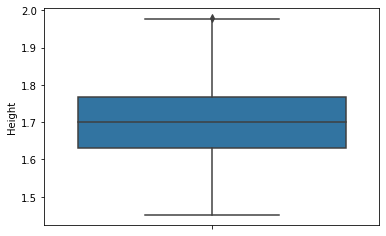

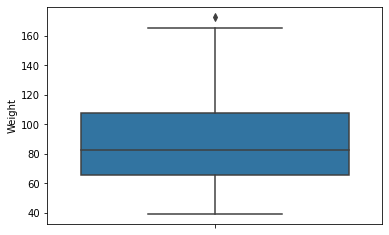

In [4]:
import seaborn as sns
sns.boxplot(y=df["Height"]);
plt.show()
sns.boxplot(y=df["Weight"]);
plt.show()

In [5]:
# We remove the outliers.
df = df[df['Weight'] < 165]

<div id="5">
    <h2>Feature Composition</h2>
    <h3>Calculating the BMI</h3> 
</div>
We calculated BMI value with height and weight values. In this way, we simplified the data.
<img src="bmi.png">

In [6]:
bmi_array = []
for index, row in df.iterrows():
    bmi = round(row['Weight'] / (row['Height'] * row['Height']), 2)
    bmi_array.append(bmi)

In [7]:
bmi_class = []
for bmi in bmi_array:
    if bmi < 18.5:
        bmi_class.append('Insufficient_Weight')
    elif bmi > 18.5 and bmi < 25:
        bmi_class.append('Normal_Weight')
    elif bmi >= 25 and bmi < 30:
        bmi_class.append('Overweight')
    elif bmi >= 30 and bmi < 35:
        bmi_class.append('Obesity_Type_I')
    elif bmi >= 35 and bmi < 40:
        bmi_class.append('Obesity_Type_II')
    else:
        bmi_class.append('Obesity_Type_III')

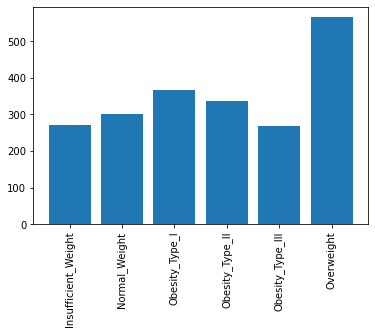

In [8]:
labels, counts = np.unique(bmi_class,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels, rotation='vertical')
plt.show()

After all calculation was made to obtain the mass body index for each individual, the results were compared with the data provided by WHO and the Mexican Normativity.

- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

There are differences between the classification in the data and the BMI classification. The rest of the page will be based on the classification in the data.

In [9]:
df.insert(2, 'BMI', bmi_array)
df.drop(['Height', 'Weight'], axis=1, inplace=True)

#### Chart showing BMI value change according to gender

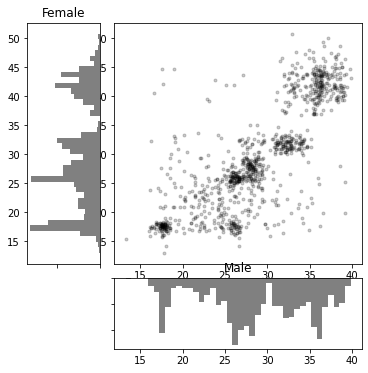

In [10]:
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
#x, y = np.random.multivariate_normal(mean, cov, 3000).T
x = np.array(df_male['BMI'])[:1000]
y = np.array(df_female['BMI'])[:1000]

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.set_title('Male')
x_hist.invert_yaxis()


y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.set_title('Female')
y_hist.invert_xaxis()

In order to train models, our data must be numbers. We convert our class data to numbers with the label encoder.

In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])
le.fit(df['family_history_with_overweight'])
df['family_history_with_overweight'] = le.transform(df['family_history_with_overweight'])
le.fit(df['FAVC'])
df['FAVC'] = le.transform(df['FAVC'])
le.fit(df['CAEC'])
df['CAEC'] = le.transform(df['CAEC'])
le.fit(df['SMOKE'])
df['SMOKE'] = le.transform(df['SMOKE'])
le.fit(df['SCC'])
df['SCC'] = le.transform(df['SCC'])
le.fit(df['CALC'])
df['CALC'] = le.transform(df['CALC'])
le.fit(df['MTRANS'])
df['MTRANS'] = le.transform(df['MTRANS'])
le.fit(df['NObeyesdad'])
df['NObeyesdad'] = le.transform(df['NObeyesdad'])

labels = [le.inverse_transform([0]),
         le.inverse_transform([1]),
         le.inverse_transform([2]),
         le.inverse_transform([3]),
         le.inverse_transform([4]),
         le.inverse_transform([5]),
         le.inverse_transform([6])]

df.head()

,Gender,Age,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,24.39,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,24.24,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,23.77,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,26.85,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,28.34,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


<div id="6">
    <h2>CART Classification Feature Importance <a href="https://machinelearningmastery.com/calculate-feature-importance-with-python/">[Site]</a></h2> 
</div>

We will find out how effective the given features are. We will see its effect on accuracy only when we give the important feature while training the models.

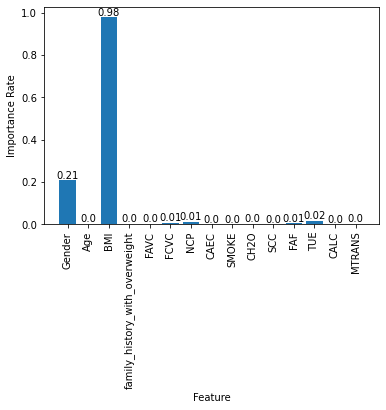

In [12]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import normalize
# define dataset

y = df['NObeyesdad'].values
X = df.drop(['NObeyesdad'], axis=1)

# define the model
model = DecisionTreeClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

n = list(X.columns)
s = normalize([importance.tolist()])[0]
line = plt.bar(n,s)
plt.xlabel('Feature')
plt.ylabel("Importance Rate")

for i in range(len(s)):
    plt.annotate(str(round(s[i], 2)), xy=(n[i],s[i]), ha='center', va='bottom')

plt.xticks(rotation = 90)
plt.show()

<div id="7">
    <h2>Classifications </h2> 
</div>

<div id="8">
    <h3>Naive Bayes Classifier</h3> 
</div>

Train set: (1265, 15) (1265,)
Test set: (844, 15) (844,)
Test set Accuracy:  0.9182464454976303


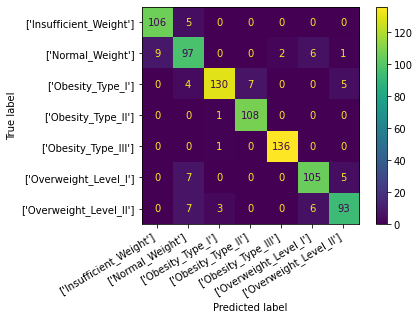

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

y = df['NObeyesdad'].values
X = df.drop(['NObeyesdad'], axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Training
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predicting
yhat=(clf.predict(X_test))

# Accuracy evaluation
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.xticks(range(7), labels[:7], ha='right', rotation=31)
plt.yticks(range(7), labels[:7])
plt.show()

#### If made using only the important features

Train set: (1265, 4) (1265,)
Test set: (844, 4) (844,)
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       111
           1       0.96      0.94      0.95       115
           2       1.00      0.89      0.94       146
           3       0.90      0.99      0.94       109
           4       0.95      1.00      0.98       137
           5       0.91      0.96      0.93       117
           6       0.98      0.91      0.94       109

    accuracy                           0.95       844
   macro avg       0.95      0.95      0.95       844
weighted avg       0.95      0.95      0.95       844

Test set Accuracy:  0.95260663507109


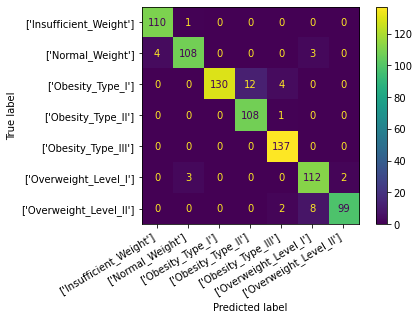

In [14]:
y = df['NObeyesdad'].values
X = df[['Gender', 'BMI', 'FCVC', 'TUE']]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Training
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predicting
yhat=clf.predict(X_test)

# Accuracy evaluation
print(classification_report(y_test, yhat))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.xticks(range(7), labels[:7], ha='right', rotation=31)
plt.yticks(range(7), labels[:7])
plt.show()

With these values, we prove that not many features but important features are more valuable.

<div id="9">
    <h3>Decision Tree Classifier</h3> 
</div>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix

y = df['NObeyesdad'].values
X = df[['Gender', 'BMI', 'FCVC', 'TUE']]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#Training and Making Predictions
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

dhat = classifier.predict(X_test)

Train set: (1265, 4) (1265,)
Test set: (844, 4) (844,)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       111
           1       0.97      0.97      0.97       115
           2       0.97      0.95      0.96       146
           3       0.96      0.96      0.96       109
           4       0.99      1.00      1.00       137
           5       0.95      0.97      0.96       117
           6       0.96      0.94      0.95       109

    accuracy                           0.97       844
   macro avg       0.97      0.97      0.97       844
weighted avg       0.97      0.97      0.97       844

Test set Accuracy:  0.9703791469194313


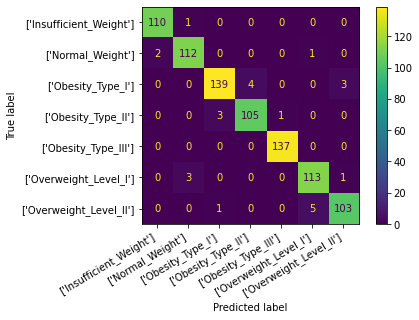

In [16]:
from sklearn.metrics import classification_report, plot_confusion_matrix

#Evaluating the Algorithm
print(classification_report(y_test, dhat))
print("Test set Accuracy: ", accuracy_score(y_test, dhat))

plot_confusion_matrix(classifier, X_test, y_test, values_format = '')  
plt.xticks(range(7), labels[:7], ha='right', rotation=31)
plt.yticks(range(7), labels[:7])
plt.show()

From the confusion matrix, you can see that out of 844 test instances, our algorithm misclassified only 24. This is 97 % accuracy. Not too bad!

<div id="10">
    <h3>KNN Classifier</h3> 
</div>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix

y = df['NObeyesdad'].values
X = df[['Gender', 'BMI', 'FCVC', 'TUE']]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1265, 4) (1265,)
Test set: (844, 4) (844,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Fitting classifier to the Training set
knnclf = KNeighborsClassifier(n_neighbors = 7)
knnclf.fit(X_train, y_train)

# Predicting the Test set results
khat = knnclf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       111
           1       0.96      0.92      0.94       115
           2       0.99      0.97      0.98       146
           3       0.97      0.98      0.98       109
           4       0.99      1.00      1.00       137
           5       0.96      0.94      0.95       117
           6       0.95      0.97      0.96       109

    accuracy                           0.97       844
   macro avg       0.97      0.97      0.97       844
weighted avg       0.97      0.97      0.97       844

Test set Accuracy:  0.9691943127962085


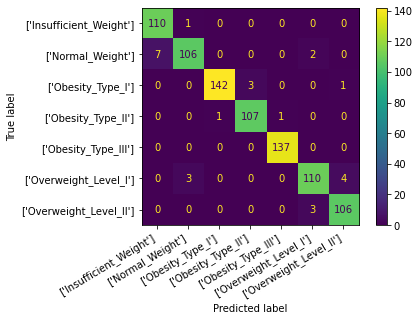

In [28]:
#Evaluating the Algorithm
print(classification_report(y_test, khat))
print("Test set Accuracy: ", accuracy_score(y_test, khat))

plot_confusion_matrix(knnclf, X_test, y_test, values_format = '')  
plt.xticks(range(7), labels[:7], ha='right', rotation=31)
plt.yticks(range(7), labels[:7])
plt.show()

From the confusion matrix, you can see that out of 844 test instances, our algorithm misclassified only 92. This is 89 % accuracy. Not the best but ok :)

<div id="11">
    <h2>Clustering </h2> 
</div>

<div id="12">
    <h3>K-Means Clustering</h3> 
</div>

The number of clusters is given 7 in our dataset, but if we did not know, we could find it with the The Elbow Method method.

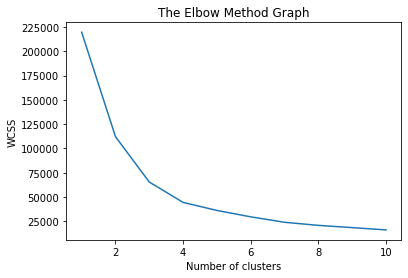

In [20]:
from sklearn.cluster import KMeans

#X = df.iloc[:, [0,2]]
y = df['NObeyesdad'].values
X = df[['Age', 'BMI']]
#X['Gender'].values

wcss=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=3)
    #kmeans algorithm fits to the X dataset
    kmeans.fit(X)
    #kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
    wcss.append(kmeans.inertia_)

#4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

When we look at the graph, it would be more accurate to take the number of clusters 3 or 4 for this data set.

In [21]:
from sklearn import metrics

kmeans = KMeans(n_clusters=7)
y_kmeans = kmeans.fit_predict(X)

metrics.rand_score(y, y_kmeans)

0.849645910766454

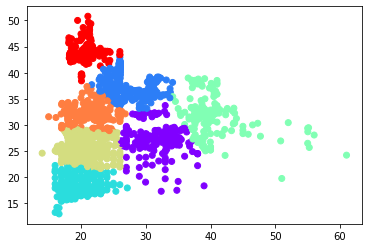

In [22]:
plt.scatter(X['Age'].values, X['BMI'].values, c=y_kmeans, cmap='rainbow')
plt.show()

<div id="13">
    <h3>Hierarchical Clustering</h3> 
</div>

In [23]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='complete')
y_hc=hc.fit_predict(X)

metrics.rand_score(y, y_hc)

0.7944536966808015

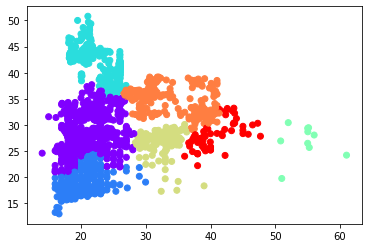

In [24]:
plt.scatter(X['Age'].values, X['BMI'].values, c=y_hc, cmap='rainbow')
plt.show()

<div id="14">
    <h3>Agglomerative Clustering</h3> 
</div>

In [25]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 7)
clusters = agg.fit_predict(X)

metrics.rand_score(y, clusters)

0.8538458562427403

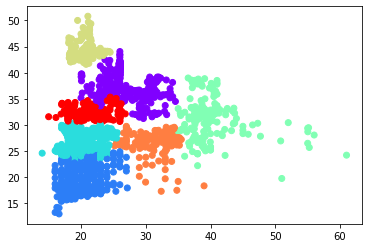

In [26]:
plt.scatter(X['Age'].values, X['BMI'].values, c=clusters, cmap="rainbow")
plt.show()

<div id="15">
    <h2>Conclusion</h2>
</div>

We analyzed our data in our dataset.We applied feature composition. We figured out which features were more important and saw the effect on accuracy when we only used the important features.

When we tested our data set with classification algorithms, Decision Tree received the highest success with 97.03.

When we tested our dataset with clustering algorithms, WARD Clustering achieved the highest success with 85.38.